## Quantitative Analysis

i.e. here, I perform a quantitative analysis of the training output datasets: are the trained models able to work better (or worse) under certain circumstances?
That is:
- with a certain type of quantifier? (all, exists) (is a certain type of quantifier harder?)
- with a certain number of keys? (generally -> or specifically: with a certain number of predicates? / constants?) (is more keys / predicates / constants harder?)
- with a certain number of constants?
- with a certain number of predicates?
- with a certain size of the world model? (is a bigger world model harder?)
- with a certain number of operators? (is more operators harder?)
- with a certain type of operator? (negation, implication, and-operator) -> especially: is there negation in front of quantifiers or not? // using only no operators vs. unary vs. binary operators // (is a certain type of operator harder (none, unary, binary)? is negation in front of quantifiers harder?)
- etc. (e.g. do the models tend to produce tautologies / contradictions?)

(dazu sowohl Output Datensatz als auch Input Datensatz laden, über id Mappen!!)
=> dann noch: weitere Spalten miteinbeziehen: correctIncorrect vs. Gibberish.

- for evaluation, we chose the datapoints: 80000:81000
- manche der unten stehenden Evals machen gegeben der Task keinen Sinn!! 
    - Task 1: Input:  World Model + Keys + Satisfied => also: macht nur world model count, constants count, keys count, predicates count Sinn. Aber nicht: quantifier, operator count, operator type.
    - Task 2: Input: Formula + Satisfied => also: umgekehrt wie task 1: es macht nur: operator count, operator type, quantifier Sinn, (predicates count). Aber nicht: world model count, constants count, keys count.
    - Task 3: Input: Formula + Keys + World Model => also: macht alles Sinn.


In [4]:
import json
import collections
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
filename = 'orca-13b_trained_on_t3_task3.json' #TODO: change 
output_dataset = pd.read_json('../results/training-eval/' + filename)
filename = 'base_pred_logic_data.json'
base_dataset = pd.read_json('../datasets/' + filename)

In [6]:
output_dataset

,Predictions,References,Correct,Gibberish
80000,unsatisfied</s>,unsatisfied,True,False
80001,satisfied</s>,satisfied,True,False
80002,unsatisfied\n\nExplanation:The formula is unsa...,unsatisfied,True,False
80003,satisfied</s>,satisfied,True,False
80004,satisfied\n\nExplanation:The formula is satisf...,satisfied,True,False
...,...,...,...,...
80995,unsatisfied</s>,unsatisfied,True,False
80996,unsatisfied\n\nExplanation:The formula says th...,unsatisfied,True,False
80997,satisfied</s>,satisfied,True,False
80998,unsatisfied</s>,unsatisfied,True,False


In [7]:
# subset:
base_dataset = base_dataset.iloc[80000:81000]
len(base_dataset)

1000

In [8]:
base_dataset

,Formula,Predicates,Variables,Operators,Quantifiers,P_mapping,C_mapping,Keys,Names,Adjectives,World Model,Valuation,Satisfied
80000,all x.-(F(x) -> -G(x)),"[G, F]",[x],"[->, -]",all,"{'G': 'Joyful', 'F': 'Calm'}","{'b': 'Aubrielle', 's': 'Wynter', 'g': 'Giovan...",G: Joyful. F: Calm. b: Aubrielle. s: Wynter. g...,"[Aubrielle, Wynter, Giovanna, Dalary, Paislee,...","[Joyful, Calm]",Aubrielle is Joyful. Wynter is not Joyful. Gi...,"[[b, Aubrielle], [s, Wynter], [g, Giovanna], [...",unsatisfied
80001,-all x.-(F(x) -> -G(x)),"[G, F]",[x],"[->, -]",all,"{'G': 'Bothered', 'F': 'Witty'}","{'l': 'Phoenix', 'i': 'Rudy', 'b': 'Kolten', '...",G: Bothered. F: Witty. l: Phoenix. i: Rudy. b:...,"[Phoenix, Rudy, Kolten, Dalton, Adley, Carson]","[Bothered, Witty]",Phoenix is Bothered. Rudy is not Bothered. Ko...,"[[l, Phoenix], [i, Rudy], [b, Kolten], [s, Dal...",satisfied
80002,all x.(F(x) & -G(x)),"[G, F]",[x],"[&, -]",all,"{'G': 'Bothered', 'F': 'Supportive'}","{'f': 'Ivan', 'k': 'Hayley', 'l': 'Gustavo'}",G: Bothered. F: Supportive. f: Ivan. k: Hayley...,"[Ivan, Hayley, Gustavo]","[Bothered, Supportive]",Ivan is Bothered. Hayley is Bothered. Gustavo...,"[[f, Ivan], [k, Hayley], [l, Gustavo], [G, [f]...",unsatisfied
80003,-all x.(F(x) & -G(x)),"[G, F]",[x],"[&, -]",all,"{'G': 'Arrogant', 'F': 'Mysterious'}",{'q': 'Nova'},G: Arrogant. F: Mysterious. q: Nova.,[Nova],"[Arrogant, Mysterious]",Nova is Arrogant. Nova is Mysterious.,"[[q, Nova], [G, [q]], [F, [q]]]",satisfied
80004,exists x.(F(x) & -G(x)),"[G, F]",[x],"[&, -]",exists,"{'G': 'Jovial', 'F': 'Creative'}","{'e': 'Beckett', 'o': 'Lia', 'b': 'Stella', 'q...",G: Jovial. F: Creative. e: Beckett. o: Lia. b:...,"[Beckett, Lia, Stella, Nancy, Calliope, Chase,...","[Jovial, Creative]",Beckett is not Jovial. Lia is Jovial. Stella ...,"[[e, Beckett], [o, Lia], [b, Stella], [q, Nanc...",satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80995,-exists x.(G(x) -> -F(x)),"[G, F]",[x],"[>, -]",exists,"{'G': 'Antagonistic', 'F': 'Humble'}","{'d': 'Dulce', 'k': 'Ezra', 'h': 'Mateo', 's':...",G: Antagonistic. F: Humble. d: Dulce. k: Ezra....,"[Dulce, Ezra, Mateo, Bentley, Adrian, Poppy, J...","[Antagonistic, Humble]",Dulce is not Antagonistic. Ezra is not Antago...,"[[d, Dulce], [k, Ezra], [h, Mateo], [s, Bentle...",unsatisfied
80996,all x.-(G(x) -> -F(x)),"[G, F]",[x],"[->, -]",all,"{'G': 'Heroic', 'F': 'Afraid'}","{'r': 'Abigail', 'c': 'Lennon', 'n': 'Salma'}",G: Heroic. F: Afraid. r: Abigail. c: Lennon. n...,"[Abigail, Lennon, Salma]","[Heroic, Afraid]",Abigail is Heroic. Lennon is Heroic. Salma is...,"[[r, Abigail], [c, Lennon], [n, Salma], [G, [r...",unsatisfied
80997,-all x.-(G(x) -> -F(x)),"[G, F]",[x],"[->, -]",all,"{'G': 'Earnest', 'F': 'Panicky'}","{'j': 'Gatlin', 's': 'Avianna'}",G: Earnest. F: Panicky. j: Gatlin. s: Avianna.,"[Gatlin, Avianna]","[Earnest, Panicky]",Gatlin is not Earnest. Avianna is Earnest. Ga...,"[[j, Gatlin], [s, Avianna], [G, [s]], [F, [j]]]",satisfied
80998,exists x.-(G(x) -> -F(x)),"[G, F]",[x],"[->, -]",exists,"{'G': 'Alarmed', 'F': 'Thoughtful'}","{'l': 'Edith', 'e': 'Trace', 'f': 'Emery', 'b'...",G: Alarmed. F: Thoughtful. l: Edith. e: Trace....,"[Edith, Trace, Emery, Harry, Anika, Taliyah, M...","[Alarmed, Thoughtful]",Edith is not Alarmed. Trace is not Alarmed. E...,"[[l, Edith], [e, Trace], [f, Emery], [b, Harry...",unsatisfied


#### Descriptive Statistics

In [9]:
satCounts = base_dataset['Satisfied'].value_counts()
satCounts

Satisfied
satisfied      505
unsatisfied    495
Name: count, dtype: int64

In [10]:
# First: show descriptive statistics of evaluation dataset:
# number of quantifiers: all, exists
quantifiersCounts = base_dataset['Quantifiers'].value_counts()
quantifiersCounts


Quantifiers
exists    503
all       497
Name: count, dtype: int64

In [11]:
# distribution of predicates
predicatesCounts = base_dataset['Predicates'].value_counts() # then add the singular F and G to one line
predicatesCounts

Predicates
[G, F]    457
[G]       281
[F]       262
Name: count, dtype: int64

In [12]:
# distribution of constants 
oldConstants = base_dataset['Names']
constants = []
for con in oldConstants:
    constants.append(len(con))
constantsCounts = collections.Counter(constants) # the keys() is what is counted, and the values() is the count
constantsCounts

Counter({7: 124,
         6: 114,
         3: 107,
         1: 52,
         5: 105,
         10: 112,
         2: 71,
         9: 109,
         4: 106,
         8: 100})

<Axes: xlabel='Number_of_constants'>

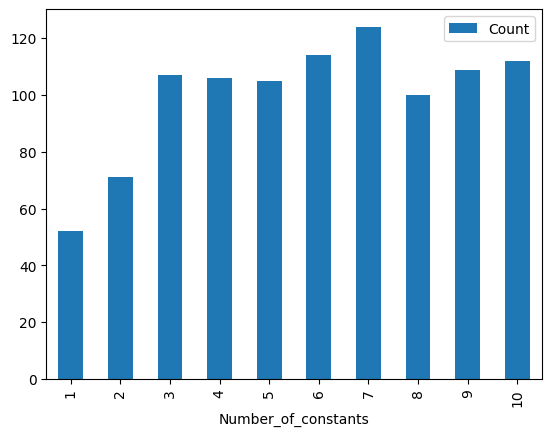

In [13]:
temp = pd.DataFrame(list(zip(constantsCounts.keys(), constantsCounts.values())), columns=['Number_of_constants','Count']).sort_values('Number_of_constants')
temp.plot(kind="bar", x = "Number_of_constants")

In [14]:
# distribution of keys
keys_list = base_dataset['Keys']
keysTemp = []
for keys in keys_list:
    keysTemp.append(keys.count(':'))
keysCounts = collections.Counter(keysTemp)
keysCounts

Counter({9: 112,
         8: 122,
         5: 99,
         3: 63,
         7: 107,
         12: 50,
         4: 88,
         11: 119,
         6: 114,
         10: 95,
         2: 31})

<Axes: xlabel='Number_of_keys'>

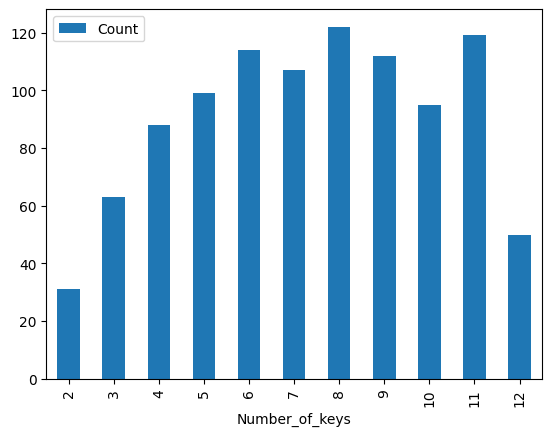

In [15]:
temp = pd.DataFrame(list(zip(keysCounts.keys(), keysCounts.values())), columns=['Number_of_keys','Count']).sort_values('Number_of_keys')
temp.plot(kind="bar", x = "Number_of_keys")

In [16]:
# distribution of world model size
worldModel_list = base_dataset['World Model']
wmTemp = []
for wm in worldModel_list:
    wmTemp.append(wm.count('.'))
worldModelCounts = collections.Counter(wmTemp)
worldModelCounts

Counter({14: 55,
         12: 53,
         6: 109,
         2: 63,
         10: 108,
         20: 50,
         4: 80,
         18: 57,
         8: 112,
         16: 43,
         7: 69,
         1: 31,
         9: 52,
         5: 59,
         3: 59})

<Axes: xlabel='Number_of_Sentences'>

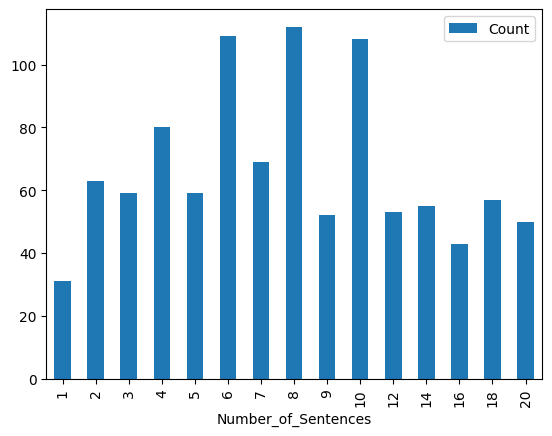

In [17]:
temp = pd.DataFrame(list(zip(worldModelCounts.keys(), worldModelCounts.values())), columns=['Number_of_Sentences','Count']).sort_values('Number_of_Sentences')
temp.plot(kind="bar", x = "Number_of_Sentences")

In [18]:
# generally: count all negations, implications, and-operators individually for each formula (string-find-count).
# from this deduce another list: total number of operators => plot this count. (is more operators harder?)
numNegations = []
numImplications = []
numAnds = []

formula_list = base_dataset['Formula']
for formula in formula_list:
    numNegations.append(formula.count("-"))
    numImplications.append(formula.count(">"))
    numAnds.append(formula.count("&"))

numTotalOperators = [a + b + c for (a, b, c) in zip(numNegations,numImplications,numAnds)]

In [19]:
negationCounts = collections.Counter(numNegations)
negationCounts

Counter({3: 293, 4: 141, 1: 184, 2: 309, 0: 45, 5: 28})

<Axes: xlabel='Number_of_Negations'>

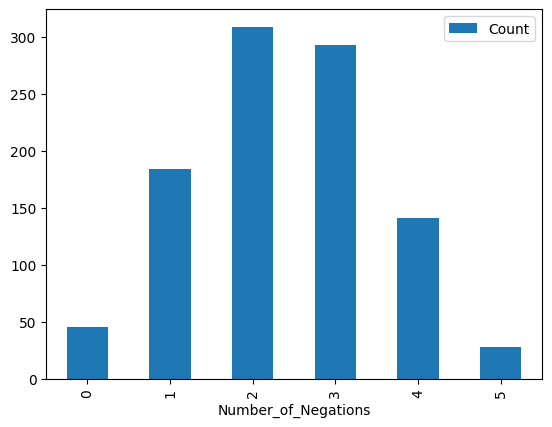

In [20]:
temp = pd.DataFrame(list(zip(negationCounts.keys(), negationCounts.values())), columns=['Number_of_Negations','Count']).sort_values('Number_of_Negations')
temp.plot(kind="bar", x = "Number_of_Negations")

In [21]:
implicationCounts = collections.Counter(numImplications)
implicationCounts

Counter({1: 468, 0: 532})

In [22]:
andCounts = collections.Counter(numAnds)
andCounts

Counter({0: 526, 1: 474})

In [23]:
totalOperatorCounts = collections.Counter(numTotalOperators)
totalOperatorCounts

Counter({4: 293, 5: 141, 2: 167, 3: 296, 1: 60, 6: 28, 0: 15})

<Axes: xlabel='Number_of_Operators'>

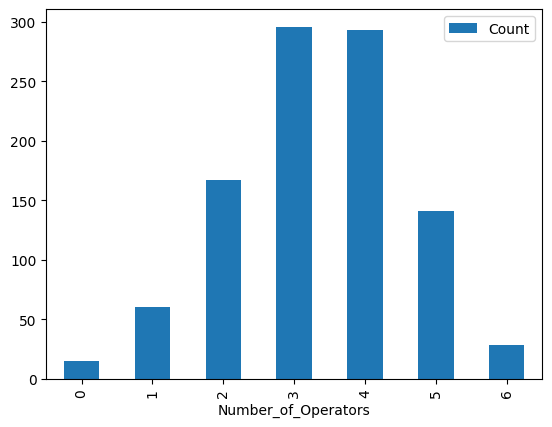

In [24]:
temp = pd.DataFrame(list(zip(totalOperatorCounts.keys(), totalOperatorCounts.values())), columns=['Number_of_Operators','Count']).sort_values('Number_of_Operators')
temp.plot(kind="bar", x = "Number_of_Operators")

In [25]:
# (is a certain type of operator harder (none, unary, binary, unary + binary)?
# none is in totalOperatorCounts 
# noOperators = [True if x == 0 else False for x in totalOperatorCounts]
# <- this is not really needed, see above.

In [26]:
# how many times there is negation in front of quantifiers vs. not (is negation in front of quantifiers harder?)
numNegationInFront = []
for formula in formula_list:
    if formula[0] == "-":
        numNegationInFront.append(True)
    else:
        numNegationInFront.append(False)
negationInFrontCounts = collections.Counter(numNegationInFront)
negationInFrontCounts

Counter({False: 506, True: 494})

In [27]:
# unary is negationCounts > 0 und implicationCounts == 0 und andCounts == 0.
# binary is negationCounts == 0 und implicationCounts > 0 oder andCounts > 0.
# unary + binary == 
unaryOperators = []
binaryOperators = []
unaryBinaryOperators = []
for nega, impl, andop in zip(numNegations, numImplications, numAnds):
    if nega > 0:
        binaryOperators.append(False)
        if impl == 0 and andop == 0:
            unaryOperators.append(True)
            unaryBinaryOperators.append(False)
        else:
            unaryOperators.append(False)
            unaryBinaryOperators.append(True)
    else:
        binaryOperators.append(True)
        unaryBinaryOperators.append(False)
        unaryOperators.append(False)

In [28]:
unaryOperatorsCounts = collections.Counter(unaryOperators)
unaryOperatorsCounts

Counter({False: 957, True: 43})

In [29]:
binaryOperatorsCounts = collections.Counter(binaryOperators)
binaryOperatorsCounts

Counter({False: 955, True: 45})

In [30]:
unaryBinaryOperatorsCounts = collections.Counter(unaryBinaryOperators)
unaryBinaryOperatorsCounts

Counter({True: 912, False: 88})

#### Dataset specific statistics

assume, we have two more columns in the output dataset: Correct (True / False), Gibberish (True / False).

But for now, just create bar charts for IncorrectCorrect.


In [31]:
output_dataset.head()

,Predictions,References,Correct,Gibberish
80000,unsatisfied</s>,unsatisfied,True,False
80001,satisfied</s>,satisfied,True,False
80002,unsatisfied\n\nExplanation:The formula is unsa...,unsatisfied,True,False
80003,satisfied</s>,satisfied,True,False
80004,satisfied\n\nExplanation:The formula is satisf...,satisfied,True,False


In [32]:
s = pd.Series([i for i in range(80000, 81000, 1)])
base_dataset.set_index([s])
base_dataset.head()

,Formula,Predicates,Variables,Operators,Quantifiers,P_mapping,C_mapping,Keys,Names,Adjectives,World Model,Valuation,Satisfied
80000,all x.-(F(x) -> -G(x)),"[G, F]",[x],"[->, -]",all,"{'G': 'Joyful', 'F': 'Calm'}","{'b': 'Aubrielle', 's': 'Wynter', 'g': 'Giovan...",G: Joyful. F: Calm. b: Aubrielle. s: Wynter. g...,"[Aubrielle, Wynter, Giovanna, Dalary, Paislee,...","[Joyful, Calm]",Aubrielle is Joyful. Wynter is not Joyful. Gi...,"[[b, Aubrielle], [s, Wynter], [g, Giovanna], [...",unsatisfied
80001,-all x.-(F(x) -> -G(x)),"[G, F]",[x],"[->, -]",all,"{'G': 'Bothered', 'F': 'Witty'}","{'l': 'Phoenix', 'i': 'Rudy', 'b': 'Kolten', '...",G: Bothered. F: Witty. l: Phoenix. i: Rudy. b:...,"[Phoenix, Rudy, Kolten, Dalton, Adley, Carson]","[Bothered, Witty]",Phoenix is Bothered. Rudy is not Bothered. Ko...,"[[l, Phoenix], [i, Rudy], [b, Kolten], [s, Dal...",satisfied
80002,all x.(F(x) & -G(x)),"[G, F]",[x],"[&, -]",all,"{'G': 'Bothered', 'F': 'Supportive'}","{'f': 'Ivan', 'k': 'Hayley', 'l': 'Gustavo'}",G: Bothered. F: Supportive. f: Ivan. k: Hayley...,"[Ivan, Hayley, Gustavo]","[Bothered, Supportive]",Ivan is Bothered. Hayley is Bothered. Gustavo...,"[[f, Ivan], [k, Hayley], [l, Gustavo], [G, [f]...",unsatisfied
80003,-all x.(F(x) & -G(x)),"[G, F]",[x],"[&, -]",all,"{'G': 'Arrogant', 'F': 'Mysterious'}",{'q': 'Nova'},G: Arrogant. F: Mysterious. q: Nova.,[Nova],"[Arrogant, Mysterious]",Nova is Arrogant. Nova is Mysterious.,"[[q, Nova], [G, [q]], [F, [q]]]",satisfied
80004,exists x.(F(x) & -G(x)),"[G, F]",[x],"[&, -]",exists,"{'G': 'Jovial', 'F': 'Creative'}","{'e': 'Beckett', 'o': 'Lia', 'b': 'Stella', 'q...",G: Jovial. F: Creative. e: Beckett. o: Lia. b:...,"[Beckett, Lia, Stella, Nancy, Calliope, Chase,...","[Jovial, Creative]",Beckett is not Jovial. Lia is Jovial. Stella ...,"[[e, Beckett], [o, Lia], [b, Stella], [q, Nanc...",satisfied


In [33]:
# - with a certain type of quantifier? (all, exists)
temp_df = pd.concat([output_dataset['Correct'], base_dataset['Quantifiers']], axis=1)
temp_df.head()

,Correct,Quantifiers
80000,True,all
80001,True,all
80002,True,all
80003,True,all
80004,True,exists


In [34]:
quantifierCounts = temp_df.groupby(['Correct', 'Quantifiers']).size()
quantifierCounts

Correct  Quantifiers
False    all             45
         exists          54
True     all            452
         exists         449
dtype: int64

In [35]:
keyCounts_df = pd.DataFrame()
keyCounts_df["keyCounts"] = pd.DataFrame(keysTemp)
keyCounts_df = keyCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
keyCounts_df["Correct"] = output_dataset['Correct']
keyCounts_df

,keyCounts,Correct
80000,9,True
80001,8,True
80002,5,True
80003,3,True
80004,9,True
...,...,...
80995,10,True
80996,5,True
80997,4,True
80998,11,True


In [36]:
keyCounts = keyCounts_df.groupby(['Correct', 'keyCounts']).size()
keyCounts

Correct  keyCounts
False    3              7
         4              6
         5             14
         6             11
         7             13
         8              9
         9             12
         10             7
         11            11
         12             9
True     2             31
         3             56
         4             82
         5             85
         6            103
         7             94
         8            113
         9            100
         10            88
         11           108
         12            41
dtype: int64

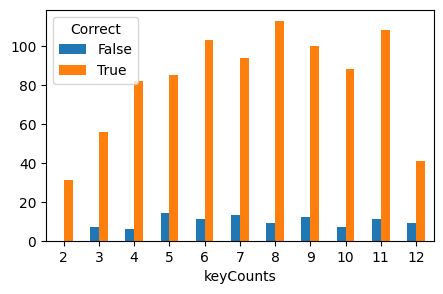

In [37]:
dfp = keyCounts_df.pivot_table(index='keyCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()


In [38]:
# - with a certain number of constants?
constantsCounts_df = pd.DataFrame()
constantsCounts_df["constantCounts"] = pd.DataFrame(constants)
constantsCounts_df = constantsCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
constantsCounts_df["Correct"] = output_dataset['Correct']
constantsCounts_df

,constantCounts,Correct
80000,7,True
80001,6,True
80002,3,True
80003,1,True
80004,7,True
...,...,...
80995,8,True
80996,3,True
80997,2,True
80998,9,True


In [39]:
constantCounts = constantsCounts_df.groupby(['Correct', 'constantCounts']).size()
constantCounts

Correct  constantCounts
False    1                   7
         2                   5
         3                  13
         4                  12
         5                  11
         6                  11
         7                   8
         8                  10
         9                  11
         10                 11
True     1                  45
         2                  66
         3                  94
         4                  94
         5                  94
         6                 103
         7                 116
         8                  90
         9                  98
         10                101
dtype: int64

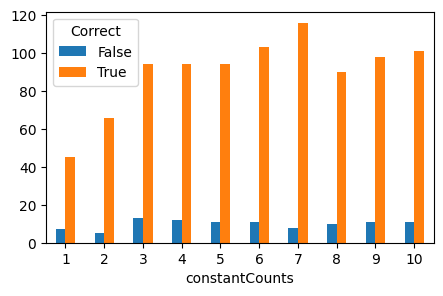

In [40]:
dfp = constantsCounts_df.pivot_table(index='constantCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [41]:
# - with a certain number of predicates?

In [42]:
oldpredicates = base_dataset['Predicates']
predicates = []
for pred in oldpredicates:
    predicates.append(len(pred))

predicatesCounts_df = pd.DataFrame()
predicatesCounts_df["predicatesCounts"] = pd.DataFrame(predicates)
predicatesCounts_df = predicatesCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
predicatesCounts_df["Correct"] = output_dataset['Correct']
predicatesCounts_df

predicatesCounts = predicatesCounts_df.groupby(['Correct', 'predicatesCounts']).size()
predicatesCounts

Correct  predicatesCounts
False    1                    17
         2                    82
True     1                   526
         2                   375
dtype: int64

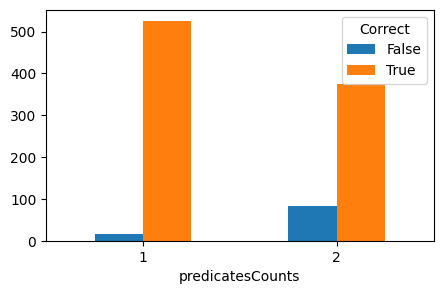

In [92]:
dfp = predicatesCounts_df.pivot_table(index='predicatesCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

FIRST LEARNING: MORE PREDICATES IS HARDER!! 

In [43]:
# - with a certain size of the world model?
wmCounts_df = pd.DataFrame()
wmCounts_df["WorldModelCounts"] = pd.DataFrame(wmTemp)
wmCounts_df = wmCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
wmCounts_df["Correct"] = output_dataset['Correct']
wmCounts_df

,WorldModelCounts,Correct
80000,14,True
80001,12,True
80002,6,True
80003,2,True
80004,14,True
...,...,...
80995,16,True
80996,6,True
80997,4,True
80998,18,True


In [44]:
wmCounts = wmCounts_df.groupby(['Correct', 'WorldModelCounts']).size()
wmCounts

Correct  WorldModelCounts
False    2                    7
         3                    1
         4                    7
         5                    1
         6                   15
         7                    1
         8                   15
         9                    2
         10                  12
         12                   8
         14                   7
         16                   5
         18                   9
         20                   9
True     1                   31
         2                   56
         3                   58
         4                   73
         5                   58
         6                   94
         7                   68
         8                   97
         9                   50
         10                  96
         12                  45
         14                  48
         16                  38
         18                  48
         20                  41
dtype: int64

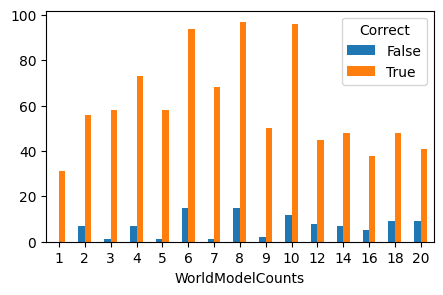

In [45]:
dfp = wmCounts_df.pivot_table(index='WorldModelCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

World model size does not seem to make a difference! -> but plot a regression or something.

In [46]:
# - with a certain number of operators? 
operatorCounts_df = pd.DataFrame()
operatorCounts_df["operatorCounts"] = pd.DataFrame(numTotalOperators)
operatorCounts_df = operatorCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
operatorCounts_df["Correct"] = output_dataset['Correct']
operatorCounts_df

,operatorCounts,Correct
80000,4,True
80001,5,True
80002,2,True
80003,3,True
80004,2,True
...,...,...
80995,4,True
80996,4,True
80997,5,True
80998,4,True


In [47]:
operatorCounts = operatorCounts_df.groupby(['Correct', 'operatorCounts']).size()
operatorCounts

Correct  operatorCounts
False    1                   8
         2                  19
         3                  39
         4                  23
         5                   5
         6                   5
True     0                  15
         1                  52
         2                 148
         3                 257
         4                 270
         5                 136
         6                  23
dtype: int64

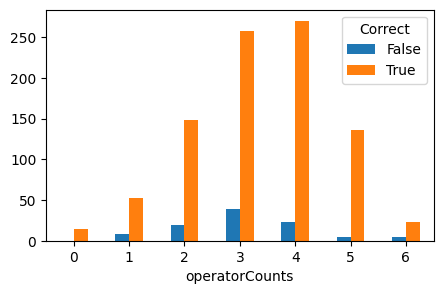

In [48]:
dfp = operatorCounts_df.pivot_table(index='operatorCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [49]:
# - with a certain type of operator? (negation, implication, and-operator) 
# negation
negationCounts_df = pd.DataFrame()
negationCounts_df["negationCounts"] = pd.DataFrame(numNegations)
negationCounts_df = negationCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
negationCounts_df["Correct"] = output_dataset['Correct']
negationCounts_df

,negationCounts,Correct
80000,3,True
80001,4,True
80002,1,True
80003,2,True
80004,1,True
...,...,...
80995,3,True
80996,3,True
80997,4,True
80998,3,True


In [50]:
negationCounts = negationCounts_df.groupby(['Correct', 'negationCounts']).size()
negationCounts

Correct  negationCounts
False    0                   8
         1                  19
         2                  39
         3                  23
         4                   5
         5                   5
True     0                  37
         1                 165
         2                 270
         3                 270
         4                 136
         5                  23
dtype: int64

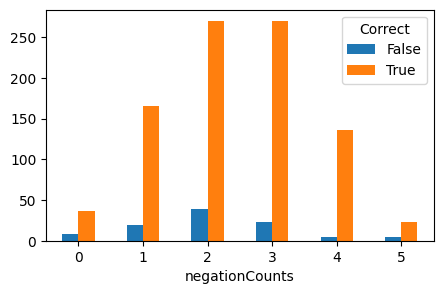

In [51]:
dfp = negationCounts_df.pivot_table(index='negationCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [52]:
# implication
implicationCounts_df = pd.DataFrame()
implicationCounts_df["implicationCounts"] = pd.DataFrame(numImplications)
implicationCounts_df = implicationCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
implicationCounts_df["Correct"] = output_dataset['Correct']
implicationCounts_df

,implicationCounts,Correct
80000,1,True
80001,1,True
80002,0,True
80003,0,True
80004,0,True
...,...,...
80995,1,True
80996,1,True
80997,1,True
80998,1,True


In [53]:
implicationCounts = implicationCounts_df.groupby(['Correct', 'implicationCounts']).size()
implicationCounts

Correct  implicationCounts
False    0                     59
         1                     40
True     0                    473
         1                    428
dtype: int64

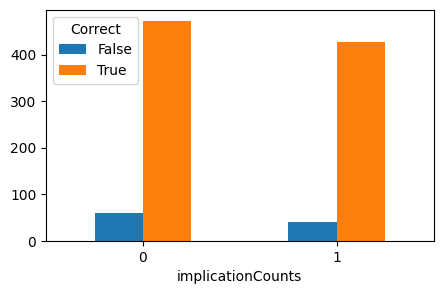

In [54]:
dfp = implicationCounts_df.pivot_table(index='implicationCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [56]:
40/428

0.09345794392523364

In [57]:
59/473

0.12473572938689217

In [58]:
# and-operator
andOpCounts_df = pd.DataFrame()
andOpCounts_df["andOpCounts"] = pd.DataFrame(numAnds)
andOpCounts_df = andOpCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
andOpCounts_df["Correct"] = output_dataset['Correct']
andOpCounts_df

,andOpCounts,Correct
80000,0,True
80001,0,True
80002,1,True
80003,1,True
80004,1,True
...,...,...
80995,0,True
80996,0,True
80997,0,True
80998,0,True


In [59]:
andOpCounts = andOpCounts_df.groupby(['Correct', 'andOpCounts']).size()
andOpCounts

Correct  andOpCounts
False    0               40
         1               59
True     0              486
         1              415
dtype: int64

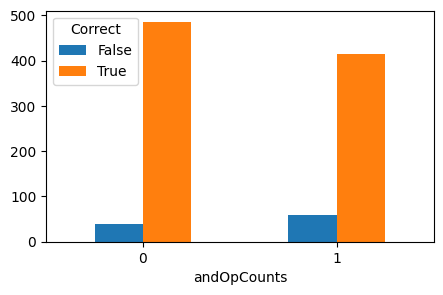

In [60]:
dfp = andOpCounts_df.pivot_table(index='andOpCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [61]:
def get_frequencies(output_dataset, count_list, column_name):
    temp_df = pd.DataFrame()
    temp_df[column_name] = pd.DataFrame(count_list)
    temp_df = temp_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
    temp_df["Correct"] = output_dataset['Correct']
    return temp_df.groupby(['Correct', column_name]).size()

In [62]:
# -> especially: is there negation in front of quantifiers or not? 
get_frequencies(output_dataset, numNegationInFront, "NegationInFront")


Correct  NegationInFront
False    False               53
         True                46
True     False              453
         True               448
dtype: int64

In [63]:
#  using only no operators vs. unary vs. binary operators // 
get_frequencies(output_dataset, unaryOperators, "UnaryOperator")

Correct  UnaryOperator
False    False             99
True     False            858
         True              43
dtype: int64

In [64]:
get_frequencies(output_dataset, binaryOperators, "BinaryOperator")


Correct  BinaryOperator
False    False              91
         True                8
True     False             864
         True               37
dtype: int64

In [65]:
get_frequencies(output_dataset, unaryBinaryOperators, "UnaryAndBinaryOperators")


Correct  UnaryAndBinaryOperators
False    False                        8
         True                        91
True     False                       80
         True                       821
dtype: int64

We need to look here at the relative frequencies: it tends to be about 5% ratio or 10% ratio. So quite balanced. i.e. no set of operators leads to a worse outcome. => Qualitative analysis necessary!

### Tautologies / Contradictions

In [66]:
import nltk
from nltk.inference.prover9 import BaseProverCommand, Prover, Prover9Command
from nltk.sem import Expression
from nltk.sem.logic import (
    AllExpression,
    AndExpression,
    EqualityExpression,
    ExistsExpression,
    Expression,
    IffExpression,
    ImpExpression,
    NegatedExpression,
    OrExpression,
)
from nltk import *
from nltk.sem.drt import DrtParser
from nltk.sem import logic

In [67]:
# a formula without assumptions is generally false (instead of undefined) for ResolutionProver.
# Tested the functions below so that tautologies are recognised, contradictions as well, but not other formulas (which are neither contradictions or tautologies).

In [68]:
def is_tautology(expression):
    # needs to be true, regardless of the input.
    # needs to be false when negated, regardless of the input.
    if ResolutionProver().prove(expression, [], verbose=True) and not ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [69]:
def is_contradiction(expression):
    # needs to be false, regardless of the input.
    # needs to be true when negated, regardless of the input.
    if not ResolutionProver().prove(expression, [], verbose=True) and ResolutionProver().prove(NegatedExpression(expression), [], verbose=True):
        return True
    else:
        return False

In [70]:
read_expr = Expression.fromstring

In [71]:
formula = read_expr(base_dataset["Formula"].iloc[59])
formula = NegatedExpression(formula) # negating a contradiction makes it a tautology.
formula

<NegatedExpression -all x.(G(x) & -G(x))>

In [72]:
res = ResolutionProver().prove(formula, [], verbose=True)

[1] {G(z2)}   A 
[2] {-G(z3)}  A 
[3] {}        (1, 2) 



Descriptive Statistics regarding tautologies

In [73]:
numTautologies = []
numContradictions = []
for i in range(len(base_dataset)):
    formula = base_dataset['Formula'].iloc[i]
    numTautologies.append(is_tautology(read_expr(formula)))
    numContradictions.append(is_contradiction(read_expr(formula)))

[1] {-F(z5), -G(z5)}  A 

[1] {-F(z7), -G(z7)}  A 

[1] {F(z9)}   A 
[2] {G(z10)}  A 

[1] {F(z12)}  A 
[2] {G(z13)}  A 

[1] {F(z15)}  A 
[2] {G(z16)}  A 

[1] {-F(z18), -G(z18)}  A 

[1] {-F(z20), G(z20)}  A 

[1] {-F(z22), G(z22)}  A 

[1] {F(z24)}   A 
[2] {-G(z25)}  A 

[1] {F(z27)}   A 
[2] {-G(z28)}  A 

[1] {F(z30)}   A 
[2] {-G(z31)}  A 

[1] {-F(z33), G(z33)}  A 

[1] {-F(z35), G(z35)}  A 

[1] {-F(z37), G(z37)}  A 

[1] {F(z39)}   A 
[2] {-G(z40)}  A 

[1] {F(z42)}   A 
[2] {-G(z43)}  A 

[1] {F(z45)}   A 
[2] {-G(z46)}  A 

[1] {-F(z48), G(z48)}  A 

[1] {F(z50)}   A 
[2] {-G(z51)}  A 

[1] {F(z53)}   A 
[2] {-G(z54)}  A 

[1] {-F(z56), G(z56)}  A 

[1] {-F(z58), G(z58)}  A 

[1] {-F(z60), G(z60)}  A 

[1] {F(z62)}   A 
[2] {-G(z63)}  A 

[1] {F(z65)}   A 
[2] {-G(z66)}  A 

[1] {F(z68)}   A 
[2] {-G(z69)}  A 

[1] {-F(z71), G(z71)}  A 

[1] {-F(z73), G(z73)}  A 

[1] {-F(z75), G(z75)}  A 

[1] {F(z77)}   A 
[2] {-G(z78)}  A 

[1] {G(z80)}   A 
[2] {-F(z81)}  A 

[1] {G(z83

In [74]:
tautologyCounts_df = pd.DataFrame()
tautologyCounts_df["tautologyCounts"] = pd.DataFrame(numTautologies)
tautologyCounts_df = tautologyCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
tautologyCounts_df["Correct"] = output_dataset['Correct']
tautologyCounts_df

,tautologyCounts,Correct
80000,False,True
80001,False,True
80002,False,True
80003,False,True
80004,False,True
...,...,...
80995,False,True
80996,False,True
80997,False,True
80998,False,True


In [75]:
tautologyCounts = tautologyCounts_df.groupby(['Correct', 'tautologyCounts']).size()
tautologyCounts

Correct  tautologyCounts
False    False               92
         True                 7
True     False              785
         True               116
dtype: int64

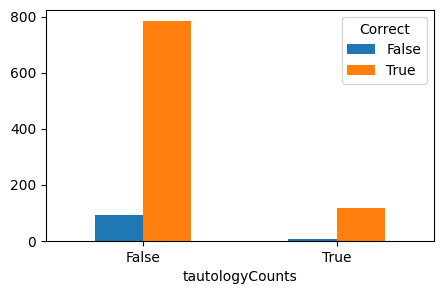

In [76]:
dfp = tautologyCounts_df.pivot_table(index='tautologyCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()

In [88]:
7/116

0.0603448275862069

In [89]:
92/785

0.11719745222929936

In [79]:
contradictionCounts_df = pd.DataFrame()
contradictionCounts_df["contradictionCounts"] = pd.DataFrame(numContradictions)
contradictionCounts_df = contradictionCounts_df.set_index(output_dataset.index) # to avoid NaNs (due to different indices)
contradictionCounts_df["Correct"] = output_dataset['Correct']
contradictionCounts_df

,contradictionCounts,Correct
80000,False,True
80001,False,True
80002,False,True
80003,False,True
80004,False,True
...,...,...
80995,False,True
80996,False,True
80997,False,True
80998,False,True


In [84]:
contradictionCounts = contradictionCounts_df.groupby(['Correct', 'contradictionCounts']).size()
contradictionCounts

Correct  contradictionCounts
False    False                   99
True     False                  783
         True                   118
dtype: int64

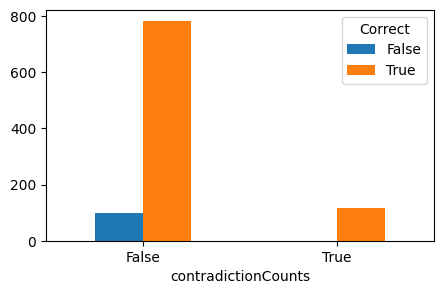

In [87]:
dfp = contradictionCounts_df.pivot_table(index='contradictionCounts', columns='Correct', values='Correct', aggfunc='size')
dfp.plot(kind='bar', figsize=(5, 3), rot=0)
plt.show()